In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

**[2]** Let's load dataset into pandas dataframe and plot data to see what we are dealing with 

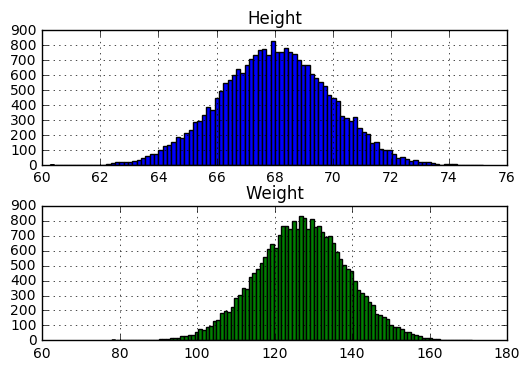

In [39]:
BINS = 100
COLORS = ['b', 'g']

df = pandas.read_csv('data.csv')
#Delete Index column since pandas will provide its own index
del df['Index']

#Throw error if num of colors and columns differ
assert(len(COLORS) == len(df.columns))

fig, axes = plt.subplots(len(df.columns), squeeze=False)
for col, axis, c in zip(df.columns, axes, COLORS):
    df.hist(column = col, bins = BINS, ax=axis, color=c, label='HALLO')


**[3]** Now let's add another feature: [BMI](https://en.wikipedia.org/wiki/Body_mass_index), and see how it is dependent on height and weight

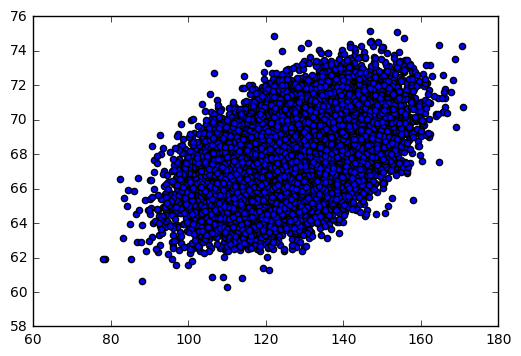

In [60]:
# Since our data in inches and pounds we must apply conversion factor
IBM_column = np.multiply(np.divide(df['Weight'], np.power(df['Height'],2)), 703)
df.assign(IBM=IBM_column)

plt.figure()
plt.scatter(x=df['Weight'], y=df['Height'])

**[4]** After we calculated `BMI` let's categorize weitgh in three categories:
+ 1 - lower than 120 pounds
+ 3 - greater or equal 150 pounds
+ 2 - everything else

In [68]:
weight_column_index = 'Weight'

# Categorize data according with requirements
def categorize(row):
    if row[weight_column_index] < 120: return 1
    elif row[weight_column_index] >= 150: return 3
    else: return 2

# Add new column to dataframe as category type    
df['Weight_Category'] = df.apply(categorize, axis=1).astype('category')

,Height,Weight,Weight_Category
0,65.78331,112.99250,1
1,71.51521,136.48730,2
2,69.39874,153.02690,3
3,68.21660,142.33540,2
4,67.78781,144.29710,2
5,68.69784,123.30240,2
6,69.80204,141.49470,2
7,70.01472,136.46230,2
8,67.90265,112.37230,1
9,66.78236,120.66720,2
